## Noah Pishaki - Physics 490 - Assignment 10

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Modify the above code for minimizing the action to address the physical context of the harmonic oscillator, namely $$ V(x) = \frac{1}{2}x^2 $$ 

#### Take $m=1$,$x_0 = 0$,$ x_{n−1} = 1$ and $T = 1$. Plot the coordinate x(t) of the particle as a function of time; also show the (analytically known) answer.

Here we know,

$ F(x) = -\frac{\partial V}{\partial x} = -x $

and

$ F(x) = -\frac{\partial^2 V}{\partial x^2} = -1 $

thus our gradient vector is,

$ \frac{S_n}{x_i} = \frac{m}{\Delta t}(2x_i-x_{i-1}-x_{x+1})-(\Delta t(x_i)) $

and Hessian,

$ \bold H_{ji} = \frac{\partial^2 S_n}{\partial x_j \partial x_i} =  \frac{m}{\Delta t}(2\delta_j,i-\delta_{j,i-1}-\delta_{j,x+1})-(\Delta t(x_i)\delta_{j,i}) $

therefore the main diagonal consists of

$ \frac{2m}{\delta t} - 3\Delta t x_i $

and subdiagonals being

$ \frac{-m}{\delta t} $

1 [0.9952141  0.99032768 0.98534026 0.98025134 0.97506048 0.96976724
 0.9643712  0.95887197 0.95326915 0.9475624  0.94175137 0.93583574
 0.92981519 0.92368944 0.91745821 0.91112124 0.9046783  0.89812917
 0.89147362 0.88471148 0.87784256 0.8708667  0.86378375 0.85659359
 0.84929608 0.84189112 0.83437862 0.82675851 0.8190307  0.81119516
 0.80325183 0.79520069 0.78704172 0.7787749  0.77040024 0.76191776
 0.75332747 0.74462942 0.73582364 0.72691018 0.71788911 0.70876049
 0.69952441 0.69018094 0.68073018 0.67117223 0.6615072  0.6517352
 0.64185634 0.63187077 0.6217786  0.61157997 0.60127503 0.59086391
 0.58034678 0.56972378 0.55899508 0.54816082 0.53722119 0.52617634
 0.51502644 0.50377166 0.49241218 0.48094818 0.46937981 0.45770727
 0.44593073 0.43405036 0.42206635 0.40997886 0.39778806 0.38549415
 0.37309728 0.36059762 0.34799535 0.33529063 0.32248363 0.30957449
 0.29656339 0.28345047 0.27023588 0.25691976 0.24350226 0.22998351
 0.21636364 0.20264278 0.18882104 0.17489853 0.16087536 0.146

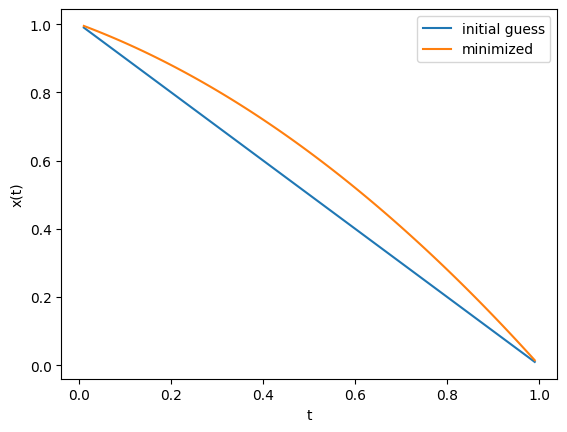

In [2]:
def params(): 
    nvar = 99; m = 1. # We have 99 middle points, 1,2,...,99
    xini, xfin = 1, 0. # x_initial = 1, x_final = 0
    tt = 1.; dt = tt/(nvar+1) # total time 1
    return nvar, m, xini, xfin, dt

def fod(der,x): # function of derivatives
    return -1 if der == 0 else -x # returns first derivative of f(x) unless f'(x) = 0 in which case returns f''(x)

def gradient(xs):
    nvar, m, xini, xfin, dt = params()
    arr = np.zeros(nvar)
    arr[0] = (m/dt)*(2*xs[0]-xini-xs[1]) + dt * fod(0,xs[0])
    arr[1:-1] = (m/dt)*(2*xs[1:-1] - xs[:-2] - xs[2:]) + dt*fod(0,xs[1:-1])
    arr[-1] = (m/dt)*(2*xs[-1]-xs[-2]-xfin) +dt * fod(0,xs[-1])
    return arr

def hessian(xs):
    nvar, m, xini, xfin, dt = params()
    he = np.diag(2*m/dt+ dt*fod(1,xs))
    np.fill_diagonal(he[1:,:], -m/dt)   
    np.fill_diagonal(he[:,1:], -m/dt)
    return he

def multi_newton(gradient,hessian,xolds,kmax=200,tol=1.e-8):
    for k in range(1,kmax):
        grad_xolds = gradient(xolds)
        he_xolds = hessian(xolds)
        xnews = xolds + gauelim_pivot(he_xolds, -grad_xolds)
        err = termcrit(xolds,xnews)
        print(k, xnews, err)
        if err < tol:
            break
        xolds = np.copy(xnews)
    else:
        xnews = None
    return xnews


def gauelim_pivot(inA,inbs):
    A = np.copy(inA)
    bs = np.copy(inbs)
    n = bs.size

    for j in range(n-1):
        k = np.argmax(np.abs(A[j:,j])) + j
        if k != j: 
            A[j,:], A[k,:] = A[k,:], A[j,:].copy() 
            bs[j], bs[k] = bs[k], bs[j]

        for i in range(j+1,n): 
            coeff = A[i,j]/A[j,j]
            A[i,j:] -= coeff*A[j,j:]
            bs[i] -= coeff*bs[j]

    xs = backsub(A,bs)
    return xs

def backsub(U,bs):
    n = bs.size
    xs = np.zeros(n)
    for i in reversed(range(n)): 
        xs[i] = (bs[i] - U[i,i+1:]@xs[i+1:])/U[i,i]
    return xs 

def termcrit(xolds,xnews):
    errs = np.abs((xnews - xolds)/xnews)
    return np.sum(errs)


if __name__ == '__main__':
    nvar, m, xini, xfin, dt = params()
    xolds = np.linspace(1,0,nvar+2)[1:-1]
    xnews = multi_newton(gradient, hessian, xolds); print(xnews)
    tlist = np.linspace(0,1,nvar+2)
    plt.plot(tlist[1:-1],xolds,label='initial guess')
    plt.plot(tlist[1:-1],xnews, label='minimized')
    plt.legend()
    plt.xlabel('t')
    plt.ylabel('x(t)')